<a href="https://colab.research.google.com/github/Lamiv/ds_training/blob/main/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BOSTON HOUSING DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_style("dark")

In [ ]:
%matplotlib inline

In [ ]:
#load data into dataframe
data = pd.read_csv('boston.csv')
#randomize
data = data.sample(frac = 1)
#split the attributes and target
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

FileNotFoundError: ignored

In [ ]:
data = pd.read_csv('SalarySurvey.csv')

FileNotFoundError: ignored

##Exploratory data analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 40 to 199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [ ]:
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [ ]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.1880115452782


In [ ]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
446,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330,19.1,393.74,6.56,26.2
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
290,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33,28.5
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73,24.4
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data['CHAS'].unique()

array([0, 1])

In [ ]:
def crim_rate(x):
  if x > 1 : return 'High'
  if x > 0.3 : return 'Medium'
  return 'Low'

def medv_rate(x):
  if x > ( 22.53 + 9.19 ) : return 'High'
  if 22.53 <= x <= ( 22.53 + 9.19 ) : return 'Above Average'
  if (22.53 - 9.19) <= x <= 22.53: return 'Average'
  return 'Low'


In [ ]:
data['MEDV_BIN'] = data['MEDV'].apply(lambda x: medv_rate(x))

In [ ]:
data['CRIM_BIN'] = data['CRIM'].apply(lambda x: crim_rate(x))

In [ ]:
data['ROOMS'] = data['RM'].apply(lambda x: math.ceil(x))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 40 to 199
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CRIM_BIN  506 non-null    object 
 15  MEDV_BIN  506 non-null    object 
 16  ROOMS     506 non-null    int64  
dtypes: float64(11), int64(4), object(2)
memory usage: 91.2+ KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ROOMS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,6.774704
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.781362
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,4.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,6.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,7.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,7.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,9.000000


Countplot

We are trying to prove... .

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



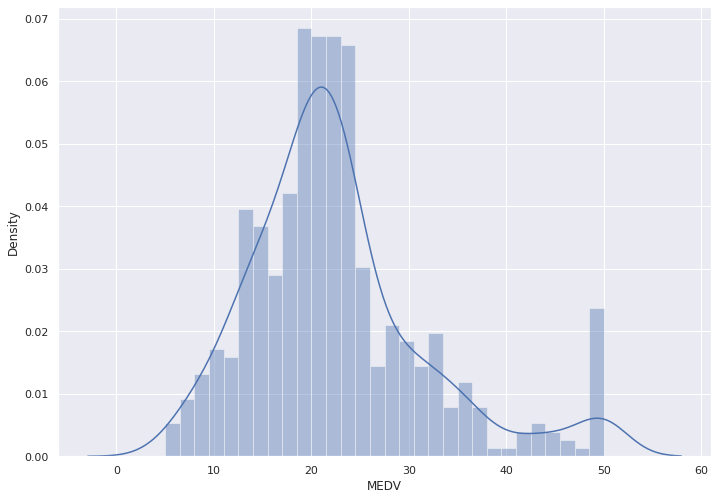

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

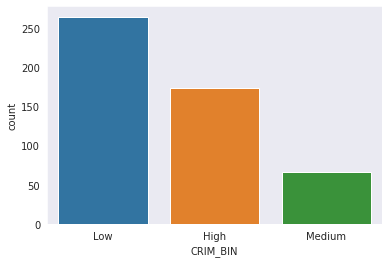

In [ ]:
sns.countplot(data=data, x = 'CRIM_BIN')

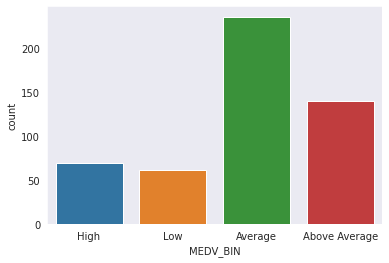

In [ ]:
sns.countplot(data=data, x = 'MEDV_BIN')

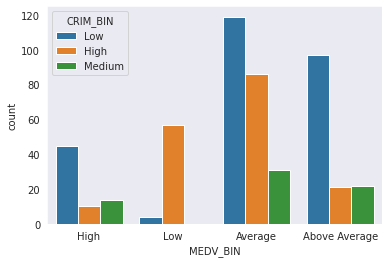

In [ ]:
sns.countplot(data=data, x = 'MEDV_BIN', hue='CRIM_BIN')


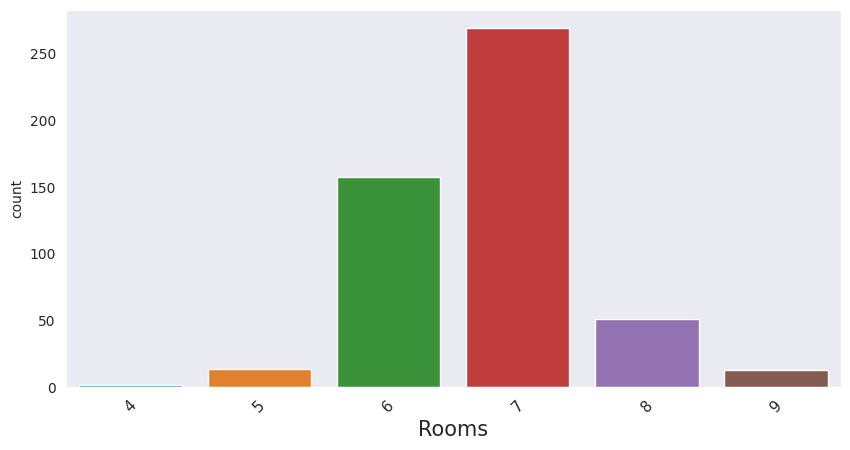

In [ ]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=data, x = 'ROOMS')
plt.xlabel('Rooms', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

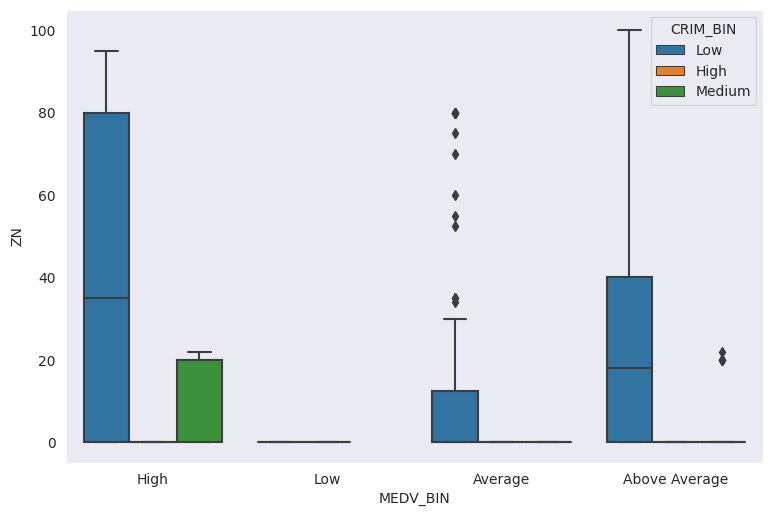

In [ ]:
df = data[data['ROOMS'] > 5]
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= df, x = 'MEDV_BIN', y = 'ZN', hue = 'CRIM_BIN', )

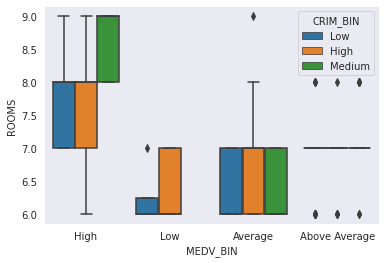

In [ ]:
sns.boxplot(data= df, x = 'MEDV_BIN', y = 'ROOMS', hue = 'CRIM_BIN', )

In [ ]:
data['ROOMS'].value_counts()

7    269
6    157
8     51
5     14
9     13
4      2
Name: ROOMS, dtype: int64

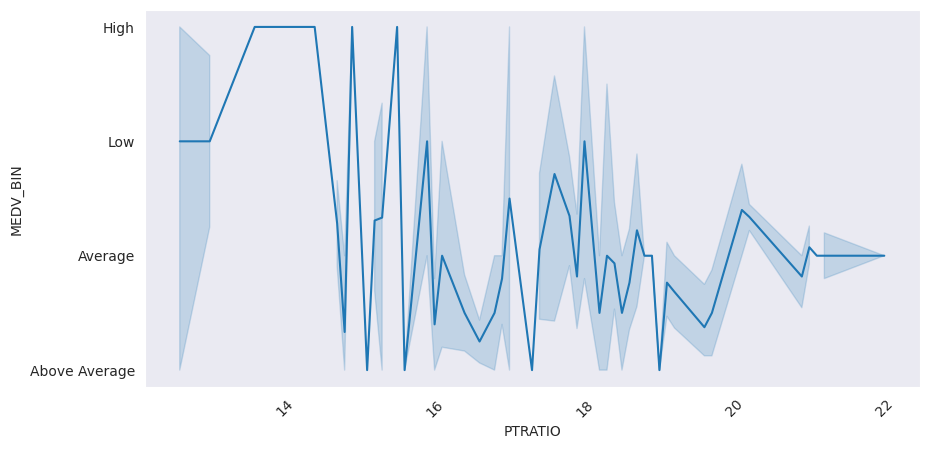

In [ ]:
fig = plt.figure(figsize=(10,5),dpi=100)
sns.lineplot(data=df, x= 'PTRATIO', y = 'MEDV_BIN')
plt.xticks(rotation=45,fontsize=10);

In [ ]:
def medv_rate_ord(x):
  if x > ( 22.53 + 9.19 ) : return '03-High'
  if 22.53 <= x <= ( 22.53 + 9.19 ) : return '02-Above Average'
  if (22.53 - 9.19) <= x <= 22.53: return '01-Average'
  return '00-Low'

In [ ]:
data['MEDV_BINO'] = data['MEDV'].apply(lambda x: medv_rate_ord(x))

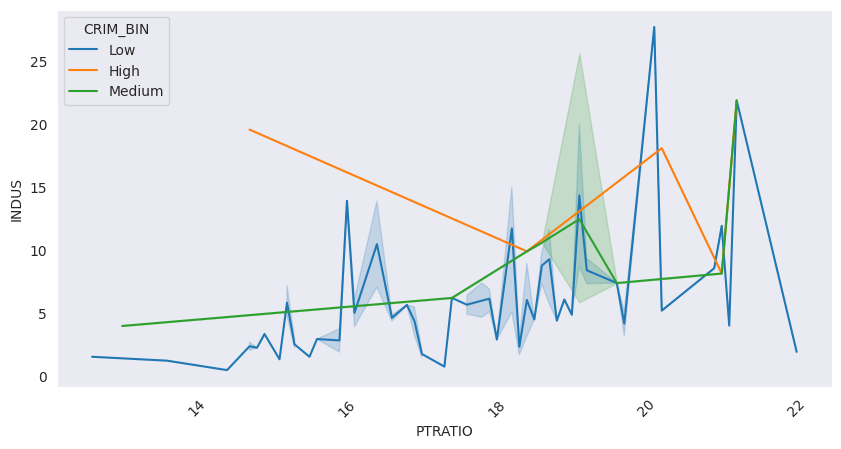

In [ ]:
fig = plt.figure(figsize=(10,5),dpi=100)
sns.lineplot(data=data, x= 'PTRATIO', y = 'INDUS', hue = 'CRIM_BIN')
plt.xticks(rotation=45,fontsize=10);

### Non linear trends in data - lmplot

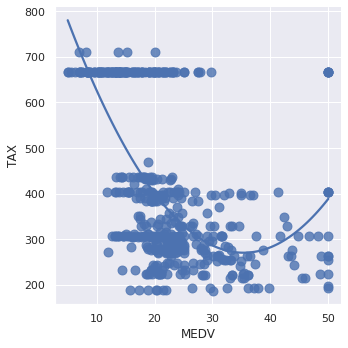

In [ ]:
sns.lmplot(x="MEDV", y="TAX", data=data,
           order=2, ci=None, scatter_kws={"s": 80});

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



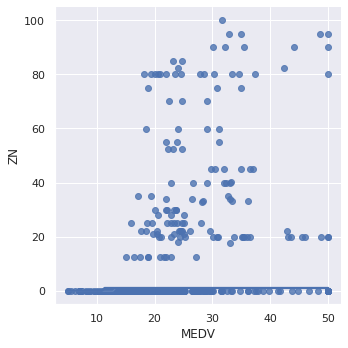

In [ ]:
sns.lmplot(x="MEDV", y="CRIM", data=data,
           logistic=True, y_jitter=.03);

### Correlation Analysis

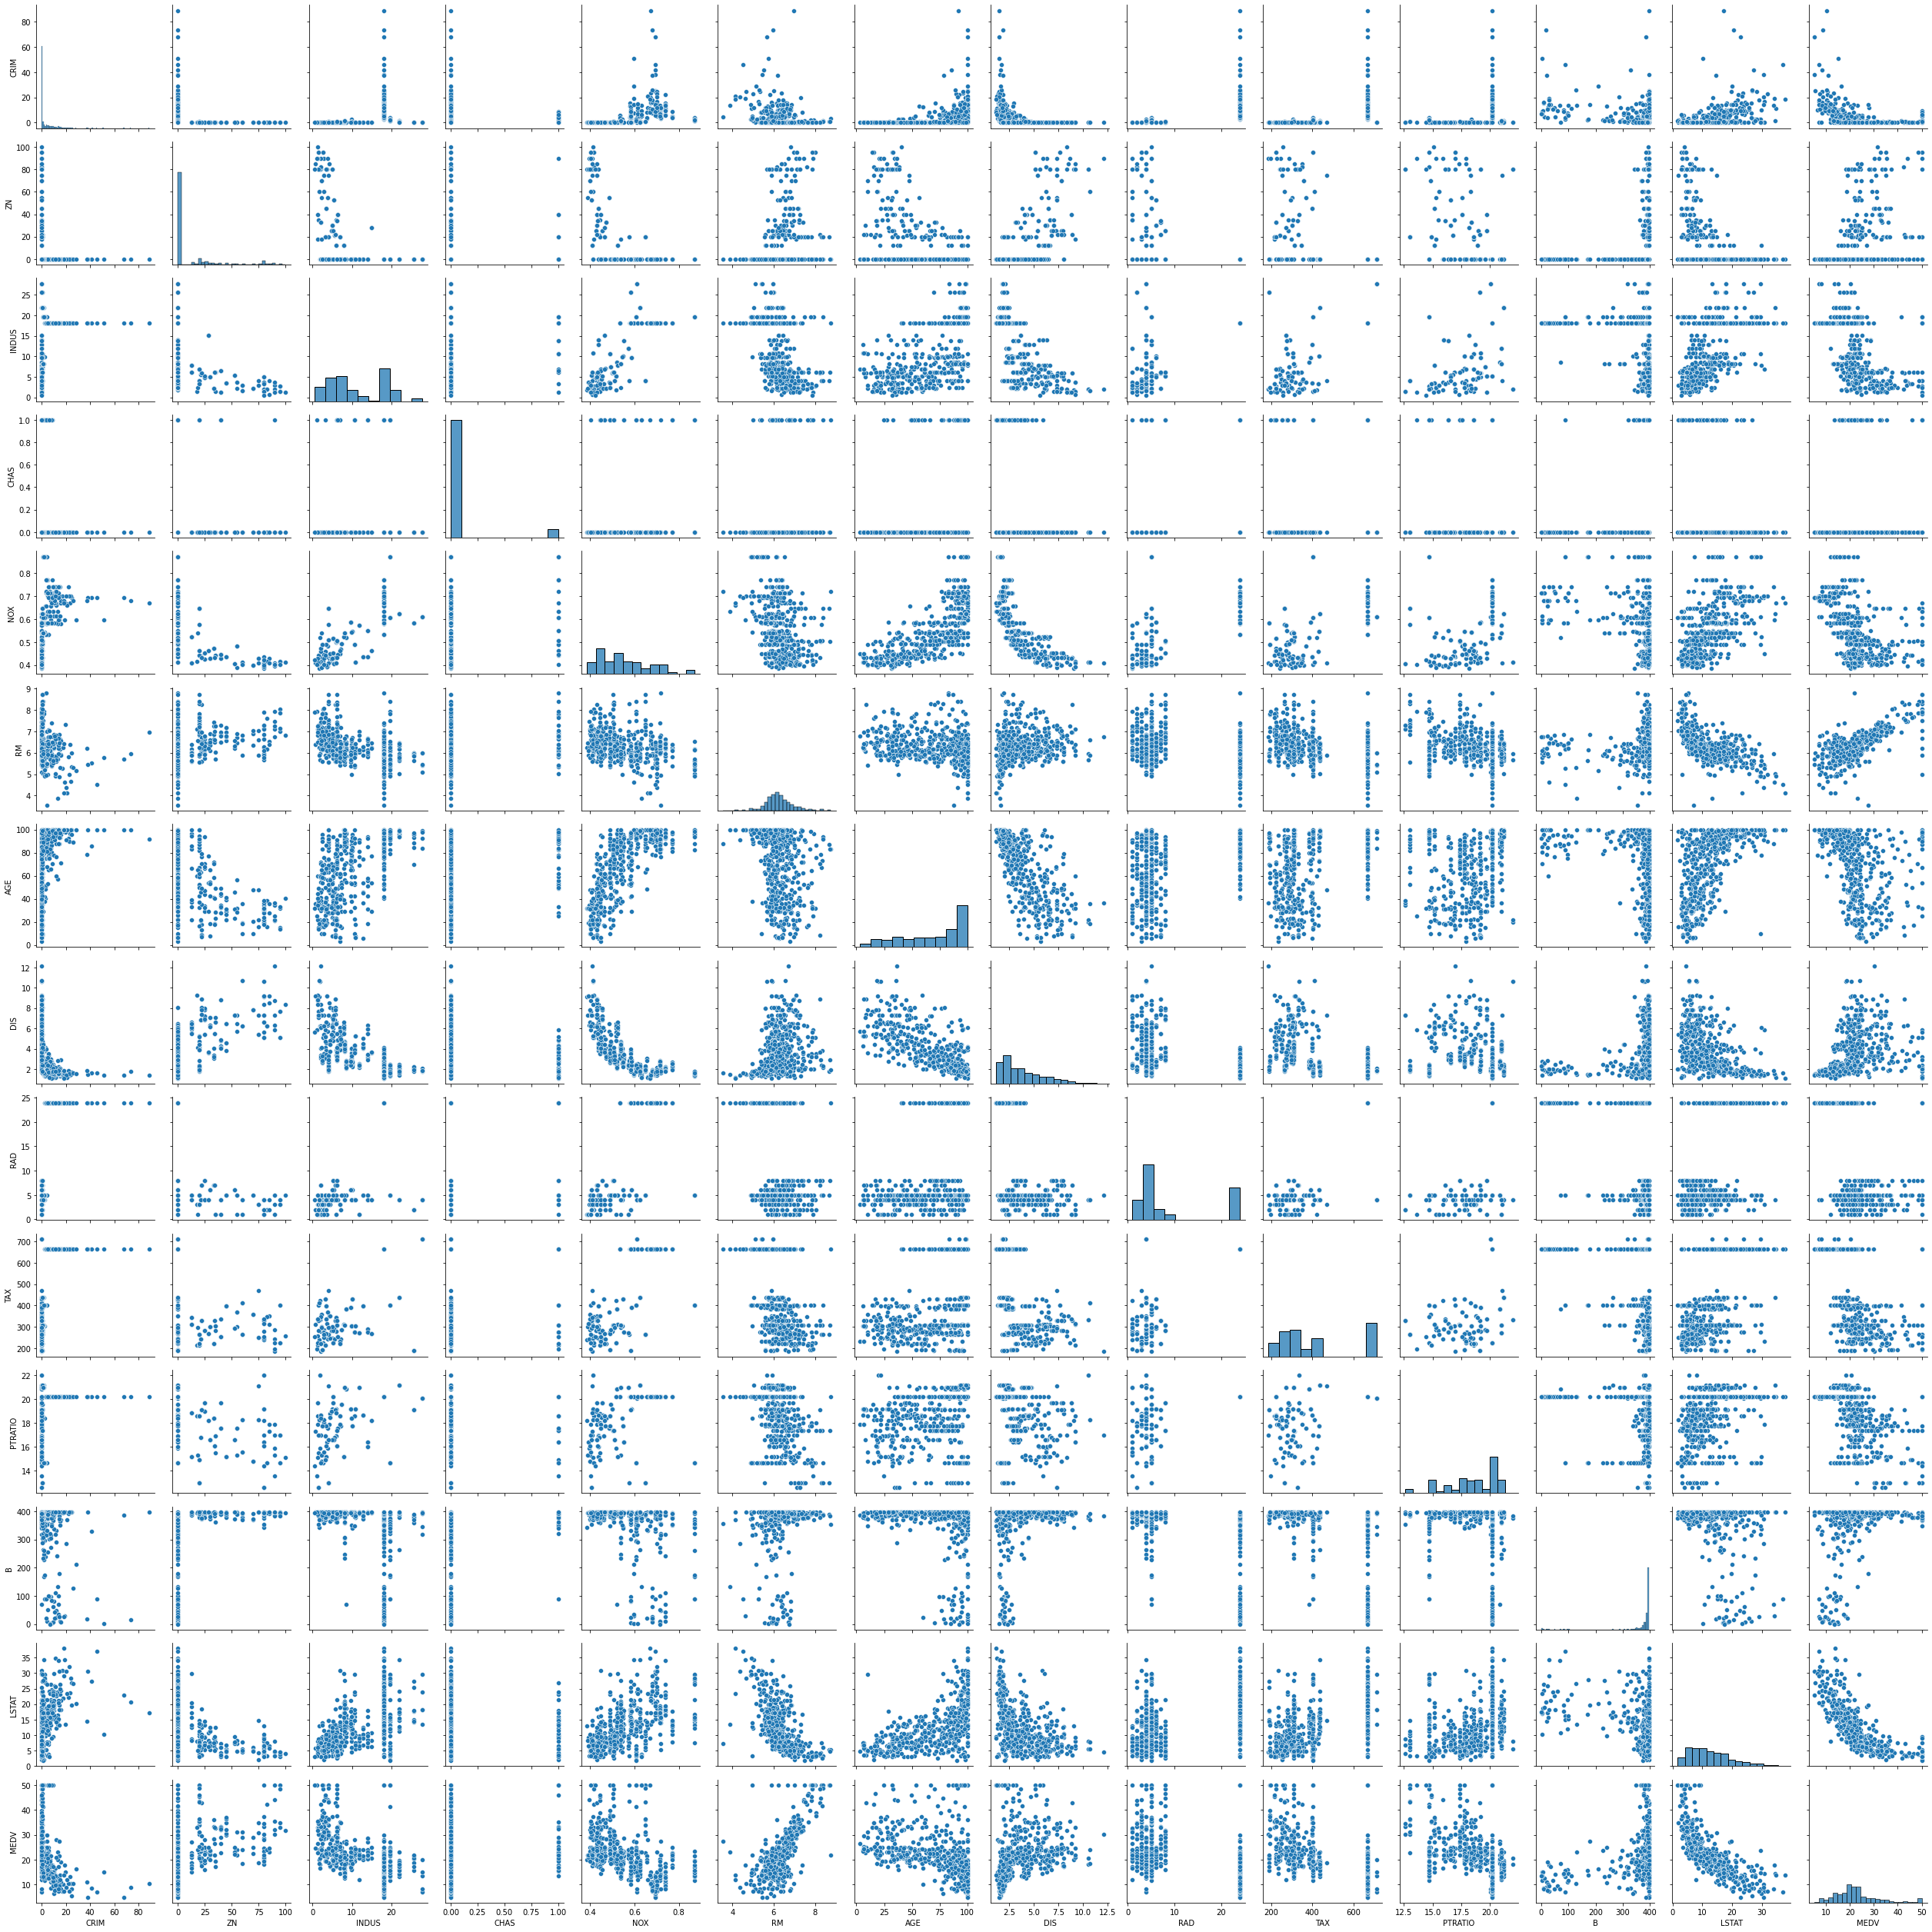

In [ ]:
# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()

In [ ]:
cols = data.columns.to_list()

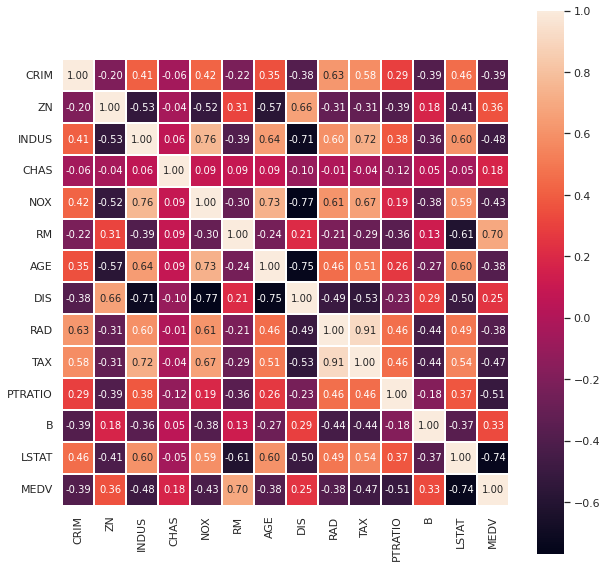

In [ ]:
# Calculate and show correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                linewidths = 1,
                annot_kws={'size': 10},
                yticklabels=cols,
                xticklabels=cols,
                ax=ax)

In [ ]:
  data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CRIM_BIN     0
MEDV_BIN     0
ROOMS        0
MEDV_BINO    0
dtype: int64

# Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The coefficients
print("Coefficients: \n", model1.coef_)

Coefficients: 
 [-1.36940542e-01  3.51675683e-02  2.09679594e-02  3.27209373e+00
 -1.69175991e+01  4.64414805e+00 -1.49287270e-02 -1.39378672e+00
  2.90031956e-01 -1.06735839e-02 -8.97995109e-01  1.07046038e-02
 -4.66614897e-01]


In [ ]:
y_predict = model1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_predict)))
r2 = r2_score(y_train, y_predict)
#accuracy = accuracy_score( Y_train, Y_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Coefficient of determination, R2 is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.5826944961642715
Coefficient of determination, R2 is 0.7530838351348201




In [ ]:
y_predict = model1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(Y_test, Y_predict)
#accuracy = accuracy_score( Y_train, Y_predict)

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Coefficient of determination, R2 is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 5.2071595117298415
Coefficient of determination, R2 is 0.6682714588410532




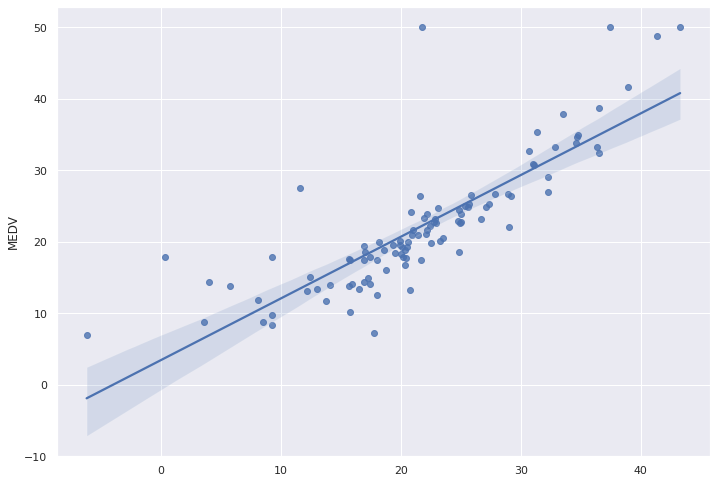

In [ ]:
sns.set_theme(color_codes=True)
sns.regplot(x= y_predict, y= y_test);

### Bayesian Ridge Rigression
-- handles insufficient or poorly distributed data

In [ ]:
from sklearn.linear_model import BayesianRidge
from scipy import stats

In [ ]:
brModel = BayesianRidge(compute_score=True)
brModel.fit(X_train, y_train)

BayesianRidge(compute_score=True)

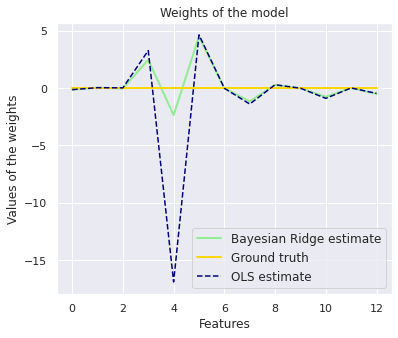

In [ ]:
lw = 2
w = np.zeros(13)
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(brModel.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(w, color="gold", linewidth=lw, label="Ground truth")
plt.plot(model1.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

In [ ]:
brModel.coef_

array([-0.13633245,  0.03764121, -0.03331882,  2.47370086, -2.36348174,
        4.50733766, -0.02559239, -1.16431036,  0.27390666, -0.01243114,
       -0.76717046,  0.01195741, -0.49816212])

Text(0.5, 0, 'Iterations')

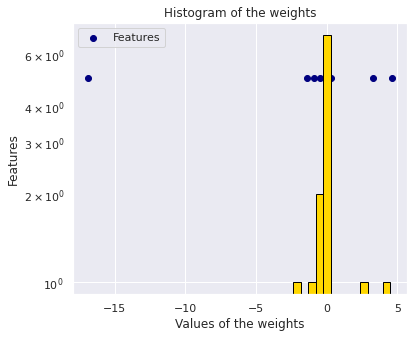

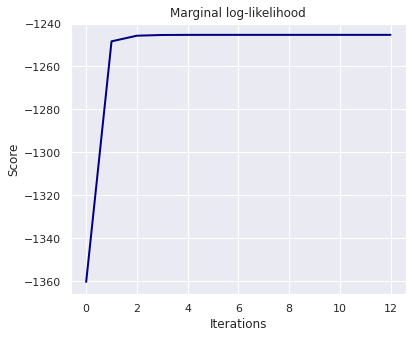

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(brModel.coef_, bins=13, color="gold", log=True, edgecolor="black")
plt.scatter( model1.coef_, np.full(13, 5.0), color="navy", label="Features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(brModel.scores_, color="navy", linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

In [ ]:
y_predict_2 = brModel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict_2)))
r2 = r2_score(y_test, y_predict_2)
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Coefficient of determination, R2 is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 5.235819579859373
Coefficient of determination, R2 is 0.6646097593272673




## MLP

In [ ]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15), 
        learning_rate = 'adaptive',
        learning_rate_init=0.01,
        max_iter = 1000,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (404). n_quantiles is set to n_samples.



done in 0.376s
Test R2 score: 0.83


#### partial dependencies on prediction?

Computing partial dependence plots...
done in 2.657s


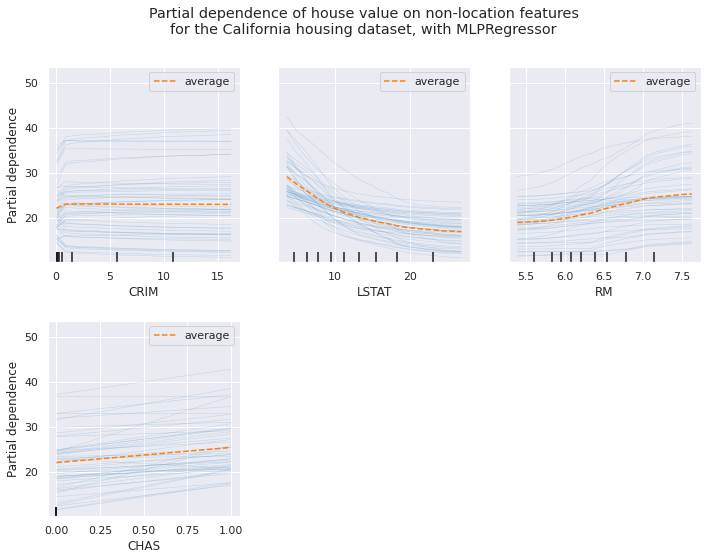

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

print("Computing partial dependence plots...")
tic = time()
features = ["CRIM", "LSTAT", "RM", "CHAS"]
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)
display.figure_.subplots_adjust(hspace=0.3)



```
# This is formatted as code
```

### Gradient boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor(random_state=0)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 0.208s
Test R2 score: 0.90


#### Re-compute partial dependancies on features of interest

Computing partial dependence plots...
done in 0.711s


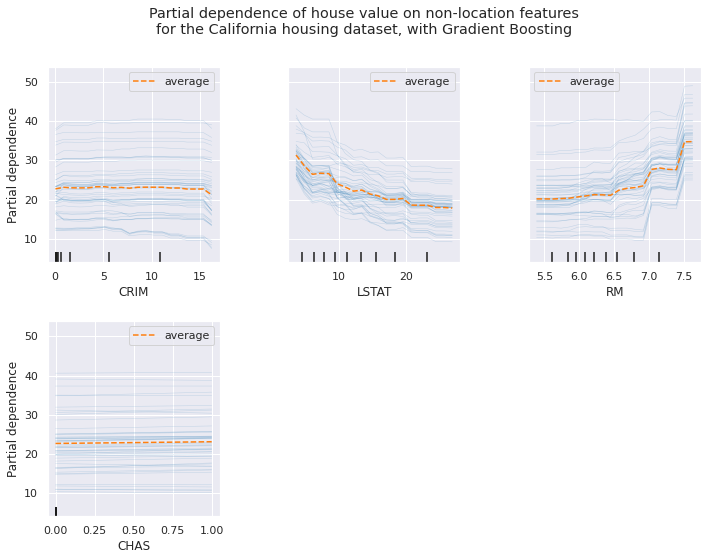

In [ ]:
print("Computing partial dependence plots...")
tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with Gradient Boosting"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)